# User Analytics in the Telecommunication Industry


In [1]:
#Importing required packages.
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.insert(0, "../scripts/")
from preprocess import Preproccessing 


In [2]:
teledf = pd.read_excel("../data/Week1_challenge_data_source.xlsx")


In [3]:
teledf.shape


(150001, 55)

In [4]:
teledf.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
Preproccessing(teledf).get_null_percentage_of_dataframe()

Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol UL < 37500B      74.561503
Nb of sec with 125000B < Vol DL             65.024900
TCP UL Retrans. Vol (Bytes)                 64.432237
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 6250B < Vol DL < 31250B      58.877607
TCP DL Retrans. Vol (Bytes)                 58.763608
HTTP UL (Bytes)                             54.539636
HTTP DL (Bytes)                             54.315638
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Last Location Name                           0.768662
MSISDN/Number                                0.710662
Bearer Id                                    0.660662
Nb of sec with Vol UL < 1250B                0.528663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

# Data Exploration


In [88]:
# number of handset types in the dataframe
teledf["Handset Type"].replace({"": None}, inplace=True)
handsetdf = teledf["Handset Type"].value_counts().nlargest(10)
handsetdf


Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

<AxesSubplot:>

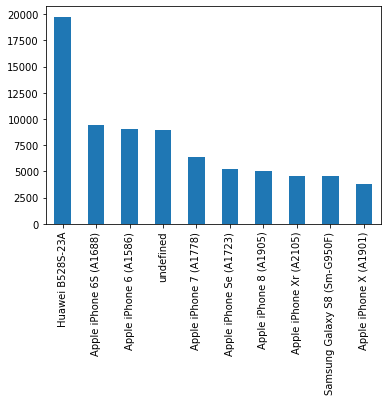

In [89]:
# number of handset types in the dataframe
handsetdf.plot(kind="bar")


In [90]:
teledf["Handset Manufacturer"].value_counts().nlargest(10)


Apple                                   59565
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: Handset Manufacturer, dtype: int64

In [91]:
teledf["Handset Manufacturer"].replace({"undefined": "NaN"}, inplace=True)
teledf["Handset Manufacturer"].dropna(inplace=True)
clean_headset_count = teledf["Handset Manufacturer"].value_counts().nlargest(10)


<AxesSubplot:>

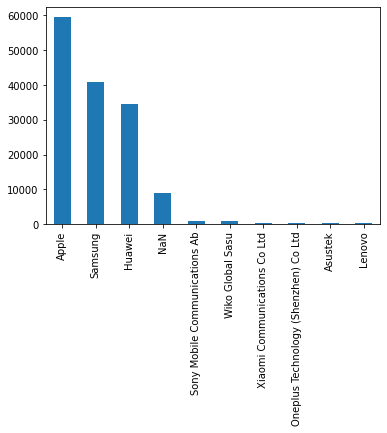

In [92]:
clean_headset_count.plot(kind="bar")


In [93]:
# teledf.loc[teledf["Handset Manufacturer"] == some_value]
clean_headset_count = teledf["Handset Manufacturer"].value_counts().nlargest(3)
clean_headset_count


Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [94]:
appledf = teledf.loc[teledf["Handset Manufacturer"] == "Apple"]
samsungdf = teledf.loc[teledf["Handset Manufacturer"] == "Samsung"]
huaweidf = teledf.loc[teledf["Handset Manufacturer"] == "Huawei"]


In [95]:
apple_handsets = appledf["Handset Type"].value_counts().nlargest(5)
samsung_handsets = samsungdf["Handset Type"].value_counts().nlargest(5)
huawei_handsets = huaweidf["Handset Type"].value_counts().nlargest(5)
print(apple_handsets)
print(samsung_handsets)
print(huawei_handsets)


Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Handset Type, dtype: int64
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Handset Type, dtype: int64


<AxesSubplot:>

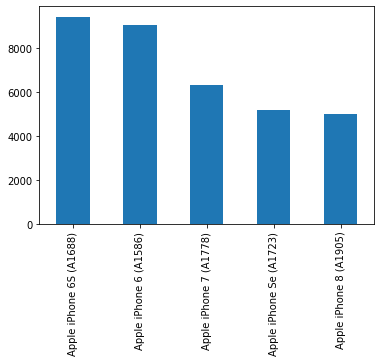

In [96]:
apple_handsets.plot(kind="bar")


<AxesSubplot:>

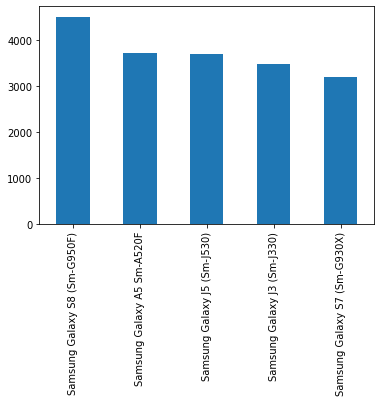

In [97]:
samsung_handsets.plot(kind="bar")


<AxesSubplot:>

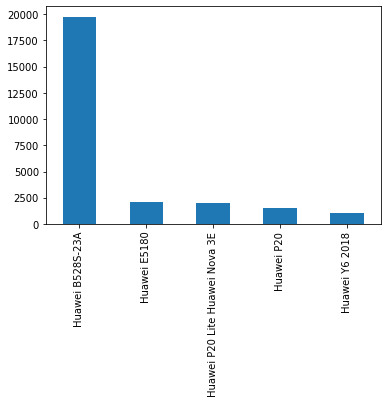

In [98]:
huawei_handsets.plot(kind="bar")


Filtering Out the neccesary data from the original dataframe


In [11]:
teledf["Bearer Id"].fillna("", inplace=True)
teledf["MSISDN/Number"].fillna("Miss", inplace=True)

teledf["Dur. (ms)"].fillna(0, inplace=True)
teledf["Total UL (Bytes)"].fillna(0, inplace=True)
teledf["Total DL (Bytes)"].fillna(0, inplace=True)

clean_df = teledf[
    [
        "MSISDN/Number",
        "Bearer Id",
        "Dur. (ms)",
        "Total UL (Bytes)",
        "Total DL (Bytes)",
        "HTTP DL (Bytes)",
        "HTTP UL (Bytes)",
        "Youtube DL (Bytes)",
        "Youtube UL (Bytes)",
        "Netflix DL (Bytes)",
        "Netflix UL (Bytes)",
        "Gaming DL (Bytes)",
        "Gaming UL (Bytes)",
        "Google DL (Bytes)",
        "Google UL (Bytes)",
        "Email DL (Bytes)",
        "Email UL (Bytes)",
        "Social Media DL (Bytes)",
        "Social Media UL (Bytes)",
        "Other DL (Bytes)",
        "Other UL (Bytes)",
    ]
]
clean_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MSISDN/Number            150001 non-null  object 
 1   Bearer Id                150001 non-null  object 
 2   Dur. (ms)                150001 non-null  float64
 3   Total UL (Bytes)         150001 non-null  float64
 4   Total DL (Bytes)         150001 non-null  float64
 5   HTTP DL (Bytes)          150001 non-null  float64
 6   HTTP UL (Bytes)          150001 non-null  float64
 7   Youtube DL (Bytes)       150001 non-null  float64
 8   Youtube UL (Bytes)       150001 non-null  float64
 9   Netflix DL (Bytes)       150001 non-null  float64
 10  Netflix UL (Bytes)       150001 non-null  float64
 11  Gaming DL (Bytes)        150001 non-null  float64
 12  Gaming UL (Bytes)        150001 non-null  float64
 13  Google DL (Bytes)        150001 non-null  float64
 14  Goog

In [12]:
teledf["HTTP DL (Bytes)"].fillna(teledf["HTTP DL (Bytes)"].mean(), inplace=True)
teledf["HTTP UL (Bytes)"].fillna(teledf["HTTP DL (Bytes)"].mean(), inplace=True)



In [13]:
clean_df.nunique()


MSISDN/Number              106857
Bearer Id                  134709
Dur. (ms)                   89526
Total UL (Bytes)           149729
Total DL (Bytes)           149988
HTTP DL (Bytes)             63528
HTTP UL (Bytes)             59943
Youtube DL (Bytes)         149547
Youtube UL (Bytes)         149477
Netflix DL (Bytes)         149518
Netflix UL (Bytes)         149490
Gaming DL (Bytes)          149983
Gaming UL (Bytes)          149316
Google DL (Bytes)          149024
Google UL (Bytes)          147267
Email DL (Bytes)           146916
Email UL (Bytes)           138699
Social Media DL (Bytes)    146856
Social Media UL (Bytes)     59078
Other DL (Bytes)           149986
Other UL (Bytes)           149284
dtype: int64

In [14]:
preprocessor = Preproccessing(clean_df)

In [15]:
# converting elements of the data frame to SI units( Bytes=>GB, ms=>Min)

byte_columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "HTTP DL (Bytes)",
    "HTTP UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)",
]

clean_df=preprocessor.convert_to_GB(byte_columns)



d:\!0 Acadamy\week 1\notebooks\../scripts\preprocess.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df[i] = self.df[i] / 1000000000
d:\!0 Acadamy\week 1\notebooks\../scripts\preprocess.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.rename(columns={i: i.replace("Bytes", "GB")}, inplace=True)
d:\!0 Acadamy\week 1\notebooks\../scripts\preprocess.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [16]:
clean_df.rename(columns={"Dur. (ms)": "Duration in Minutes"}, inplace=True)
clean_df


C:\Users\hp\AppData\Local\Temp\ipykernel_13296\4087347393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.rename(columns={"Dur. (ms)": "Duration in Minutes"}, inplace=True)


,MSISDN/Number,Bearer Id,Duration in Minutes,Total UL (GB),Total DL (GB),HTTP DL (GB),HTTP UL (GB),Youtube DL (GB),Youtube UL (GB),Netflix DL (GB),...,Gaming DL (GB),Gaming UL (GB),Google DL (GB),Google UL (GB),Email DL (GB),Email UL (GB),Social Media DL (GB),Social Media UL (GB),Other DL (GB),Other UL (GB)
0,33664962239.0,13114483460844900352.0,1823652.0,0.036750,0.308880,0.114471,0.114471,0.015855,0.002501,0.008199,...,0.278082,0.014344,0.001634,0.001271,0.003564,0.000138,0.001546,0.000024,0.171744,0.008814
1,33681854413.0,13114483482878900224.0,1365104.0,0.053800,0.653385,0.114471,0.114471,0.020247,0.019112,0.018338,...,0.608750,0.001171,0.003494,0.000920,0.000629,0.000308,0.001926,0.000007,0.526904,0.015055
2,33760627129.0,13114483484080500736.0,1361762.0,0.027884,0.279807,0.114471,0.114471,0.019726,0.014700,0.017588,...,0.229585,0.000396,0.008535,0.001694,0.002690,0.000673,0.001684,0.000042,0.410693,0.004216
3,33750343200.0,13114483485442799616.0,1321509.0,0.043324,0.846029,0.114471,0.114471,0.021388,0.015147,0.013995,...,0.799538,0.010850,0.009024,0.002788,0.001440,0.000631,0.000644,0.000013,0.749040,0.012797
4,33699795932.0,13114483499480700928.0,1089009.0,0.038543,0.569139,0.114471,0.114471,0.015259,0.018963,0.017125,...,0.527707,0.003530,0.006248,0.001501,0.001936,0.000174,0.000863,0.000050,0.550709,0.013910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,33650688697.0,7277825670196679680.0,81230.0,0.057629,0.574175,0.114471,0.114471,0.016192,0.011763,0.017884,...,0.526610,0.009197,0.009968,0.002817,0.000058,0.000633,0.003465,0.000052,0.003265,0.013487
149997,33663449963.0,7349883264234609664.0,97970.0,0.039135,0.666649,0.114471,0.114471,0.013877,0.008288,0.019350,...,0.626893,0.004735,0.002229,0.002186,0.001954,0.000167,0.002345,0.000008,0.712180,0.002458
149998,33621890103.0,13114483573367300096.0,98249.0,0.034912,0.592786,0.114471,0.114471,0.022661,0.001856,0.009964,...,0.553539,0.013394,0.003851,0.002735,0.001526,0.000533,0.001246,0.000014,0.121101,0.011315
149999,33619622058.0,13114483573367300096.0,97910.0,0.029626,0.371896,0.114471,0.114471,0.008817,0.008305,0.003322,...,0.352537,0.002529,0.004190,0.003567,0.002228,0.000623,0.000802,0.000022,0.814713,0.001407


In [17]:

arr = [
    "Duration in Minutes",
    "Total UL (GB)",
    "Total DL (GB)",
    "HTTP DL (GB)",
    "HTTP UL (GB)",
    "Youtube DL (GB)",
    "Youtube UL (GB)",
    "Netflix DL (GB)",
    "Netflix UL (GB)",
    "Gaming DL (GB)",
    "Gaming UL (GB)",
    "Google DL (GB)",
    "Google UL (GB)",
    "Email DL (GB)",
    "Email UL (GB)",
    "Social Media DL (GB)",
    "Social Media UL (GB)",
    "Other DL (GB)",
    "Other UL (GB)",
]
preprocessor=Preproccessing(clean_df)

newconcat=preprocessor.get_aggrigate_sum(arr)
bearer = preprocessor.get_aggrigate_count("Bearer Id")
newconcat["MSISDN/Number"] = bearer["MSISDN/Number"]
newconcat["Bearer Id"] = bearer["Bearer Id"]



newconcat.head()


,Duration in Minutes,Total UL (GB),Total DL (GB),HTTP DL (GB),HTTP UL (GB),Youtube DL (GB),Youtube UL (GB),Netflix DL (GB),Netflix UL (GB),Gaming DL (GB),...,Google DL (GB),Google UL (GB),Email DL (GB),Email UL (GB),Social Media DL (GB),Social Media UL (GB),Other DL (GB),Other UL (GB),MSISDN/Number,Bearer Id
0,116720.0,0.036053,0.842637,0.114471,1.144710e-01,0.014900,0.006724,0.010265,0.016916,0.811091,...,0.003337,0.001052,0.000837,0.000494,0.002207,0.000026,0.377097,0.009474,33601001722.0,1
1,181230.0,0.036104,0.120755,0.114471,1.144710e-01,0.005324,0.007108,0.000771,0.010451,0.105035,...,0.004198,0.001137,0.002829,0.000479,0.002599,0.000062,0.279558,0.002152,33601001754.0,1
2,134969.0,0.039307,0.556660,0.114471,1.144710e-01,0.002137,0.019196,0.016526,0.002828,0.529068,...,0.003343,0.000100,0.002436,0.000769,0.003148,0.000048,0.495087,0.006607,33601002511.0,1
3,49878.0,0.020328,0.401993,0.000009,6.530000e-07,0.004393,0.002584,0.001157,0.000785,0.388075,...,0.005938,0.003741,0.002179,0.000106,0.000251,0.000029,0.025248,0.010032,33601007832.0,1
4,37104.0,0.094281,1.363130,0.299679,1.192048e-01,0.010340,0.031193,0.024972,0.024230,1.308981,...,0.013729,0.004771,0.002248,0.001058,0.002861,0.000051,0.777644,0.027161,33601008617.0,2


In [18]:



aggregate_info = pd.DataFrame(
    columns=[
        "MSISDN/Number",
        "Bearer Id",
        "Duration in Minutes",
        "Total UL/DL",
        "HTTP UL/DL",
        "Youtube UL/DL",
        "Netflix UL/DL",
        "Gaming UL/DL",
        "Google UL/DL",
        "Email UL/DL",
        "Social Media UL/DL",
        "Other UL/DL",
    ]
)

aggregate_info["MSISDN/Number"] = newconcat["MSISDN/Number"]
aggregate_info["Bearer Id"] = newconcat["Bearer Id"]
aggregate_info["Duration in Minutes"] = newconcat["Duration in Minutes"]


aggregate_info["Total UL/DL"] = newconcat["Total UL (GB)"] + newconcat["Total DL (GB)"]
aggregate_info["HTTP UL/DL"] = newconcat["HTTP UL (GB)"] + newconcat["HTTP DL (GB)"]
aggregate_info["Youtube UL/DL"] = (
    newconcat["Youtube UL (GB)"] + newconcat["Youtube DL (GB)"]
)
aggregate_info["Netflix UL/DL"] = (
    newconcat["Netflix UL (GB)"] + newconcat["Netflix DL (GB)"]
)
aggregate_info["Gaming UL/DL"] = (
    newconcat["Gaming UL (GB)"] + newconcat["Gaming DL (GB)"]
)
aggregate_info["Google UL/DL"] = (
    newconcat["Google UL (GB)"] + newconcat["Google DL (GB)"]
)
aggregate_info["Email UL/DL"] = newconcat["Email UL (GB)"] + newconcat["Email DL (GB)"]
aggregate_info["Social Media UL/DL"] = (
    newconcat["Social Media UL (GB)"] + newconcat["Social Media DL (GB)"]
)
aggregate_info["Other UL/DL"] = newconcat["Other UL (GB)"] + newconcat["Other DL (GB)"]


aggregate_info


,MSISDN/Number,Bearer Id,Duration in Minutes,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
0,33601001722.0,1,116720.0,0.878691,0.228942,0.021625,0.027181,0.812459,0.004389,0.001331,0.002232,0.386571
1,33601001754.0,1,181230.0,0.156860,0.228942,0.012432,0.011222,0.119750,0.005335,0.003308,0.002661,0.281710
2,33601002511.0,1,134969.0,0.595966,0.228942,0.021334,0.019354,0.538828,0.003443,0.003205,0.003196,0.501694
3,33601007832.0,1,49878.0,0.422321,0.000009,0.006977,0.001942,0.391126,0.009678,0.002285,0.000280,0.035280
4,33601008617.0,2,37104.0,1.457411,0.418884,0.041533,0.049202,1.314798,0.018500,0.003305,0.002913,0.804804
...,...,...,...,...,...,...,...,...,...,...,...,...
106852,33789997247.0,1,140988.0,0.480307,0.228942,0.019852,0.008531,0.437003,0.005430,0.002514,0.000499,0.211115
106853,3197020876596.0,1,877385.0,0.232124,0.228942,0.011960,0.026592,0.178049,0.010439,0.001521,0.000715,0.470526
106854,337000037000919.0,1,253030.0,0.596288,0.228942,0.036735,0.030905,0.510143,0.009831,0.003319,0.000522,0.149188
106855,882397108489451.0,1,869844.0,0.139154,0.228942,0.040941,0.028846,0.043070,0.009219,0.003331,0.001546,0.401360


In [19]:
# clean_df.loc[clean_df["MSISDN/Number"] == 33601008617]
aggregate_info.drop(
    aggregate_info.loc[aggregate_info["MSISDN/Number"] == "Miss"].index, inplace=True
)
aggregate_info


,MSISDN/Number,Bearer Id,Duration in Minutes,Total UL/DL,HTTP UL/DL,Youtube UL/DL,Netflix UL/DL,Gaming UL/DL,Google UL/DL,Email UL/DL,Social Media UL/DL,Other UL/DL
0,33601001722.0,1,116720.0,0.878691,0.228942,0.021625,0.027181,0.812459,0.004389,0.001331,0.002232,0.386571
1,33601001754.0,1,181230.0,0.156860,0.228942,0.012432,0.011222,0.119750,0.005335,0.003308,0.002661,0.281710
2,33601002511.0,1,134969.0,0.595966,0.228942,0.021334,0.019354,0.538828,0.003443,0.003205,0.003196,0.501694
3,33601007832.0,1,49878.0,0.422321,0.000009,0.006977,0.001942,0.391126,0.009678,0.002285,0.000280,0.035280
4,33601008617.0,2,37104.0,1.457411,0.418884,0.041533,0.049202,1.314798,0.018500,0.003305,0.002913,0.804804
...,...,...,...,...,...,...,...,...,...,...,...,...
106851,33789996170.0,1,8810.0,0.714642,0.000730,0.026648,0.014903,0.660361,0.007531,0.001007,0.000300,0.295283
106852,33789997247.0,1,140988.0,0.480307,0.228942,0.019852,0.008531,0.437003,0.005430,0.002514,0.000499,0.211115
106853,3197020876596.0,1,877385.0,0.232124,0.228942,0.011960,0.026592,0.178049,0.010439,0.001521,0.000715,0.470526
106854,337000037000919.0,1,253030.0,0.596288,0.228942,0.036735,0.030905,0.510143,0.009831,0.003319,0.000522,0.149188


producing clean data

In [20]:
aggregate_info.to_csv("../data/clean_user_info.csv")
print("SUCCESSFULLY SAVED TO FILE")

SUCCESSFULLY SAVED TO FILE
